# Notebook for parsing BIST stock data

Possible sources: 
1. **Oyak Yatırım API**: 
  * `code`: stock code (TUKAS, CRDFA etc.)
  * `mode`:
    * 0: last day
    * 1: last week
    * 2: last month
    * 3: last year
    * 4: last 5 years
  * example: [TUKAS 5 YRS](https://www.oyakyatirim.com.tr/Equity/GetHistoricalEquityData?mode=4&code=TUKAS)

In [83]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [97]:
# seconds to date format
def dateify(x):
    return datetime.fromtimestamp(x/1000).strftime("%Y.%m.%d %I:%M")

In [98]:
def get_oyak_data(code, mode=2):
    
    # mode
    # 0 : past day
    # 1 : past week
    # 2 : past month
    # 3 : past year
    # 4 : past 5 yrs
    
    if 0 > mode or mode > 4:
        return [[],[]]
    
    r = requests.get(f"https://www.oyakyatirim.com.tr/Equity/GetHistoricalEquityData?mode={mode}&code={code}")
    return np.array(eval(r.text))

In [109]:
def get_dates_vals(series):
    dates = [ dateify(seconds) for seconds in series[:,0] ]
    vals  = series[:,1]
    return dates, vals

In [119]:
def plot_series(code, dates, values):
    plt.figure(figsize=(16,9))
    plt.plot(dates, values)
    plt.xticks(dates[::20], rotation=45)
    #plt.xlabel('date')
    plt.ylabel('price (TRY)')
    plt.title(f'BIST {code} historical data')
    plt.grid()

# Parsing and viewing the data

Using oyak yatırım's API

In [120]:
code        = 'TUKAS'

series      = get_oyak_data(code, 4)

dates, vals = get_dates_vals(series)

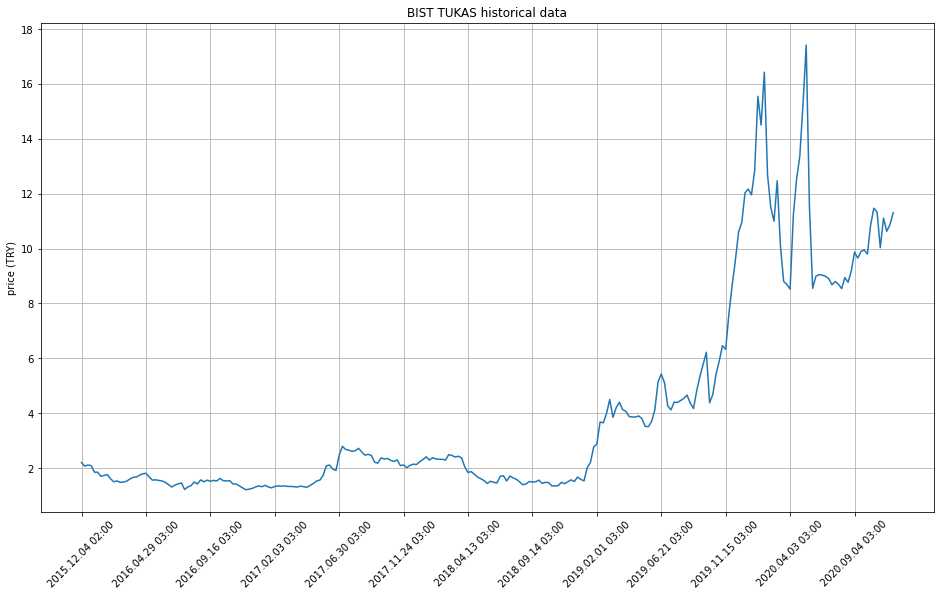

In [121]:
plot_series(code, dates, vals)